# Linear Regression with `scikit-learn`

### Table of Contents

1. [Splitting data into training and testing data](#1.-Splitting-data-into-training-and-testing-data)
2. [EDA with visualizations](#2.-EDA-with-visualizations)
3. [Fitting a model with `LinearRegression` from `scikit-learn`](#3.-Fitting-a-model-with-`LinearRegression`-from-`scikit-learn`)
4. [Exercise: linear regression with `scikit-learn`](#4.-Exercise:-linear-regression-with-`scikit-learn`)
5. [Fitting a model with `LinearRegression` from `scikit-learn` (cont.)](#3.-Fitting-a-model-with-`LinearRegression`-from-`scikit-learn` (cont.))
6. [Exercise: cross-validated linear regression with multiple variables](#5.-Exercise:-cross-validated-linear-regression-with-multiple-variables)
7. [Interaction terms](#6.-Interaction-terms)
8. [Exercise: interaction terms](#7.-Exercise:-interaction-terms)
9. [Reference](#8.-Reference)

### 1. Splitting data into training and testing data

In [1]:
# importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
# Importing sales and advertising channels data

adv = pd.read_csv('../data/advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales,Region
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


In [3]:
# Split data into train and test

train, test = train_test_split(adv,
                               test_size=0.3,
                               random_state=1)


# Convert train test splits to dataframes, for convenience

train = pd.DataFrame(data=train,
                     columns=adv.columns)

test = pd.DataFrame(data=test,
                    columns=adv.columns)

### 2. EDA with visualizations

#### Plot radio spending against sales

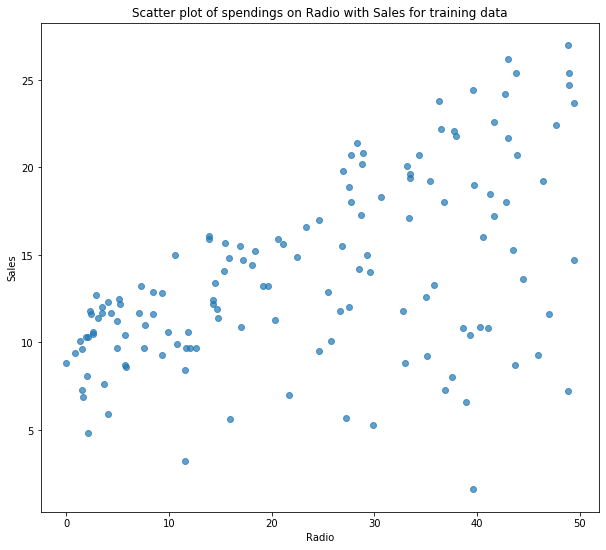

In [4]:
plt.figure(figsize=(10,9))

plt.scatter(train.Radio,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on Radio with Sales for training data')

plt.show()

#### Plot newspaper spending against sales

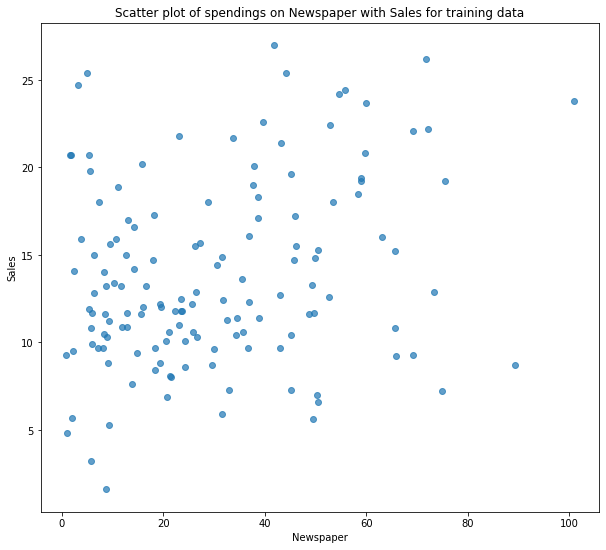

In [5]:
plt.figure(figsize=(10,9))

plt.scatter(train.Newspaper,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on Newspaper with Sales for training data')

plt.show()

#### Plot TV spending against sales

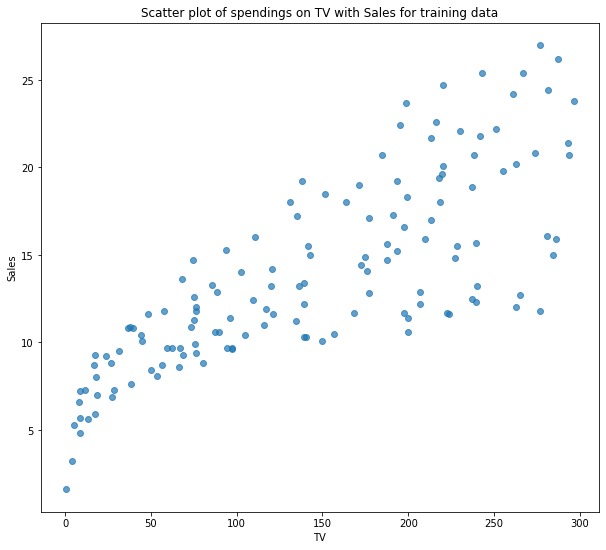

In [6]:
plt.figure(figsize=(10,9))

plt.scatter(train.TV,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("TV")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on TV with Sales for training data')

plt.show()

### Plot the region against sales

In [ ]:
plt.figure(figsize=(10,9))

plt.scatter(train.Region,
            train.Sales,
            alpha=0.7)  # Plot the raw data

plt.xlabel("Region")
plt.ylabel("Sales")
plt.title('Scatter plot of Region with Sales for training data')

plt.show()

### 3. Fitting a model with `LinearRegression` from `scikit-learn` 

In [7]:
# Fit a linear regression model using OLS
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

slm = LinearRegression()
slm.fit(train['Radio'][:,np.newaxis],
        train['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Evaluate the output for the model fitted on the training data

intercept = slm.intercept_
coef = slm.coef_
score = slm.score(test['Radio'][:,np.newaxis],
                  test['Sales'])

print('Linear Regression model score for the training data is {}'.format(score))
print('Linear Regression model coeficient for the training data is {}'.format(coef))
print('Linear Regression model intercept for the training data is {}'.format(intercept))

# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Linear Regression model score for the training data is 0.41293932917162335
Linear Regression model coeficient for the training data is [0.1874808]
Linear Regression model intercept for the training data is 9.440936561425886


### 4. Exercise: linear regression with `scikit-learn`

__(10 min.)__

1. Given coefficient estimates, predict the y-value for `train.Radio.min()` & `train.Radio.max()`
2. Create a scatter plot that also shows the data and the line of best fit

___Hint___: Use the convention `plt.plot([x_min, x_max], [y_min, y_max])` and `plt.scatter(x, y)` next to each other

In [24]:
import seaborn as sns
y=pd.DataFrame()
y[0,0]=test['Radio'].values.min()
y[0,1]=test['Radio'].values.max()
y[1,0]=slm.predict([[test['Radio'].values.min()]])
y[1,1]=slm.predict([[test['Radio'].values.max()]])



In [26]:
y

,"(0, 0)","(0, 1)","(1, 0)","(1, 1)"
0,NaN,NaN,9.497181,18.739984


In [25]:
sns.plot(x=y[1],y=y[0])

KeyError: 1

### 5. Fitting a model with `LinearRegression` from `scikit-learn` (cont.)

In [ ]:
# Evaluate the fit of the model based off of the training set

preds = slm.predict(test['Radio'][:,np.newaxis])

from sklearn.metrics import mean_squared_error
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


mse = np.sqrt(mean_squared_error(test['Sales'],
                                 preds))

print('Mean sqauared error for Linear Regression model is {}'.format(mse))

In [ ]:
# Evaluate the model fit based off of cross validation

from sklearn.model_selection import cross_val_score
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores = cross_val_score(slm, adv['Radio'][:,np.newaxis],
                         adv['Sales'],
                         cv=3,
                         scoring='neg_mean_squared_error')

mscvs = np.mean(np.sqrt(-scores))

print('Mean squared cross validation score for Linear Regression model is {}'.format(mscvs))

### 6. Exercise: cross-validated linear regression with multiple variables

__(10 min.)__ 
1. Run a multiple regression with Radio and TV spending. 
  - Which coefficient has a higher value?
  - What does this suggest practically?
2. Calculate the 5-fold CV RMSE. Is it better or worse than before?

In [ ]:
# 1) 
# Evaluate the fit of the model based off of the training set

# 2)
# Evaluate the model fit based off of cross validation

### 7. Interaction terms

__What__: Interaction measures the combined effect of two variables acting together

__Why__: This is a way to make predictions and inferences when two input variables are correlated with each other

__Note__: Whenever you include interaction terms, it is conventional to include the main effects as well

In [ ]:
# Creating a interaction variable using expenses on Radio and TV

train['Radio_TV'] = train['Radio'] * train['TV']
lmi = LinearRegression()


# Fitting the model using new interaction variable created

lmi.fit(train[['TV', 'Radio', 'Radio_TV']],
        train['Sales'])

lmi_coef = lmi.coef_ 

### 8. Exercise: interaction terms

__(10 min.)__ Check to see if any interaction terms are worth including in the model

### 9. Reference

- [Linear Regression (with `scikit-learn`)](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
- [`scikit-learn` `LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [`scikit-learn` LR score](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)
- [Mean square error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [Cross validation score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)